<span style="color:crimson;font-size:22px"><b> Background of UCI Heart Failure Dataset </b></span> 

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

The dataset is from the University of California Irvine Machine Learning Repository.

| Variable Name | Type | Description | Units |
|----------|:-----------|:-----------|:-----------|
|age|Integer|Age of the Patient|Years|
|anemia|Binary|Decrease of red blood cells or hemoglobin|
|creatinine_phosphokinase|Integer|Level of CPK enzyme in the blood|mcg/L|
|diabetes|Binary|Diabetes status of a patient|
|ejection_fraction|Integer|Portion of blood leaving the heart in each cardiac contraction|%|
|high_blood_pressure|Binary|Whether the patient has hypertension|
|platelets|Continuous|Count of platelets in the blood|kiloplatelets/mL|
|serum_creatinine|Continuous|Level of serum creatinine in the blood|mg/dL|
|serum_sodium|Continuous|Level of serum sodium in the blood|mEq/L|
|sex|Binary|Gender of patient|
|smoking|Binary|Whether the patient smokes or not|
|time|Integer|Follow-up period|days|
|death_event|Binary|Whether the patient died during the follow-up period|

<span style="color:crimson;font-size:22px"><b> Step 1: Exploratory Data Analysis </b></span>
### 1.1 Importing appropriate libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

### 1.2 Loading Data

In [2]:
df = pd.read_csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### 1.3 Summary Statistics



In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


[Text(0, 0.5, 'Percentage')]

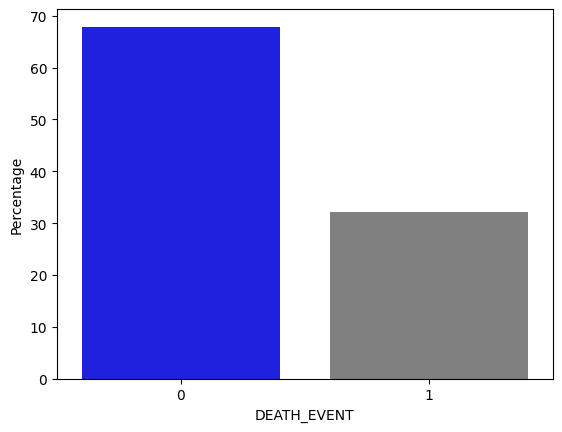

In [4]:
ax = sns.barplot(x = "DEATH_EVENT", y = "DEATH_EVENT", data = df, estimator = lambda x: len(x) / len(df) * 100, palette = ["blue", "grey"])
ax.set(ylabel = "Percentage")

**Comment:** There is a class imbalance, which will later be addressed using SMOTE technique.

### 1.4 Visualising Correlation Matrix of Input Features

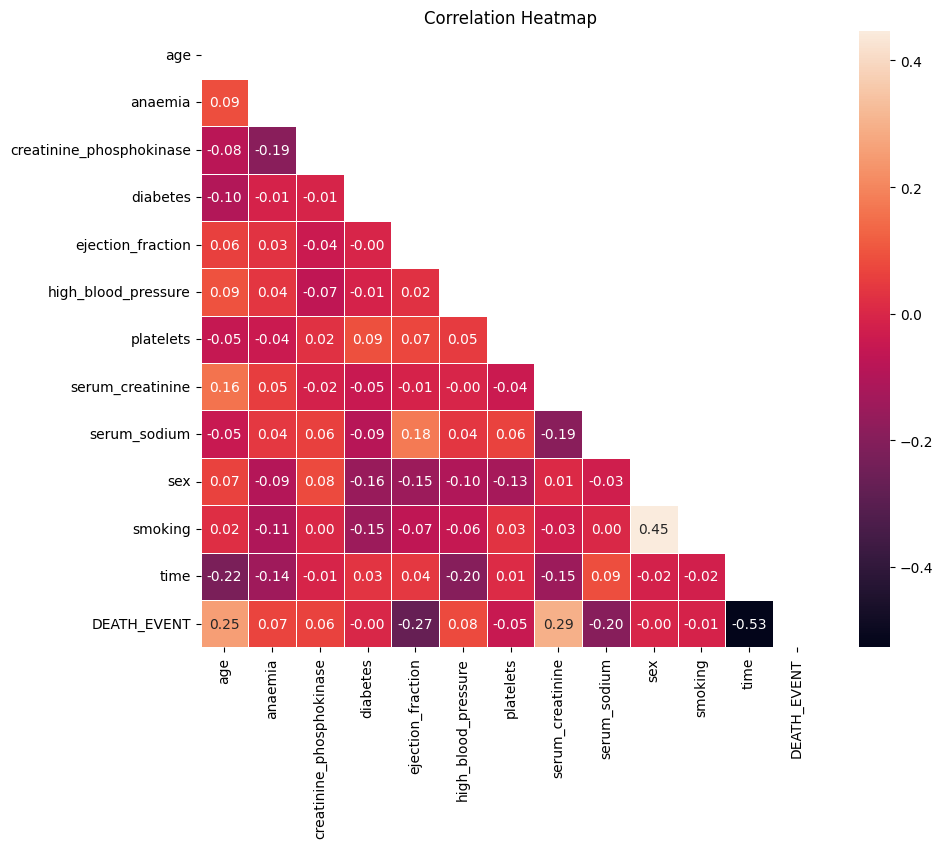

In [5]:
#corr_df = df.drop("DEATH_EVENT", axis = 1).corr()
corr_df = df.corr()
plt.figure(figsize=(10, 8))
mask = np.triu(corr_df)
sns.heatmap(corr_df, mask = mask, linewidths = 0.5, annot = True, fmt = ".2f")
plt.title("Correlation Heatmap")
plt.show()

**Observations:**

**Limitation**: Correlation coefficients only capture linear relationships. There could still be non-linear relationships among the features themselves and the outcome class.

* Features are uncorrelated with each other except there is a high positive correlation between sex and smoking.
* Time appears to be the most important feature in determining the DEATH_EVENT outcome. This makes sense as the longer it takes the patient to receive treatment, the higher the chances of a fatality (as apparent from the negative relationship between time and DEATH_EVENT)
* DEATH_EVENT does not seem linearly correlated with features such as anaemia, creatinine phosphokinase, diabetes, high blood pressure etc. (however, this does not mean there is no non-linear correlation)
* There is a high negative correlation between time and DEATH_EVENT (It seems that the longer the follow-up, the more likely the patient dies)
* ejection_fraction is negatively correlated on DEATH_EVENT, which is expected as the ejection_fraction reflects the heart efficiency
* serum_creatinine is also an important influence on DEATH_EVENT, as it represents how well the kidneys are filtering the waste from the blood, and makes the heart function better (positively correlated)
* Age is positively correlated with DEATH_EVENT, which makes sense as older individuals are more likely to suffer from a fatality.

### 1.5 Plotting Distribution of Single Variables and Relationship between Variables

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


[]

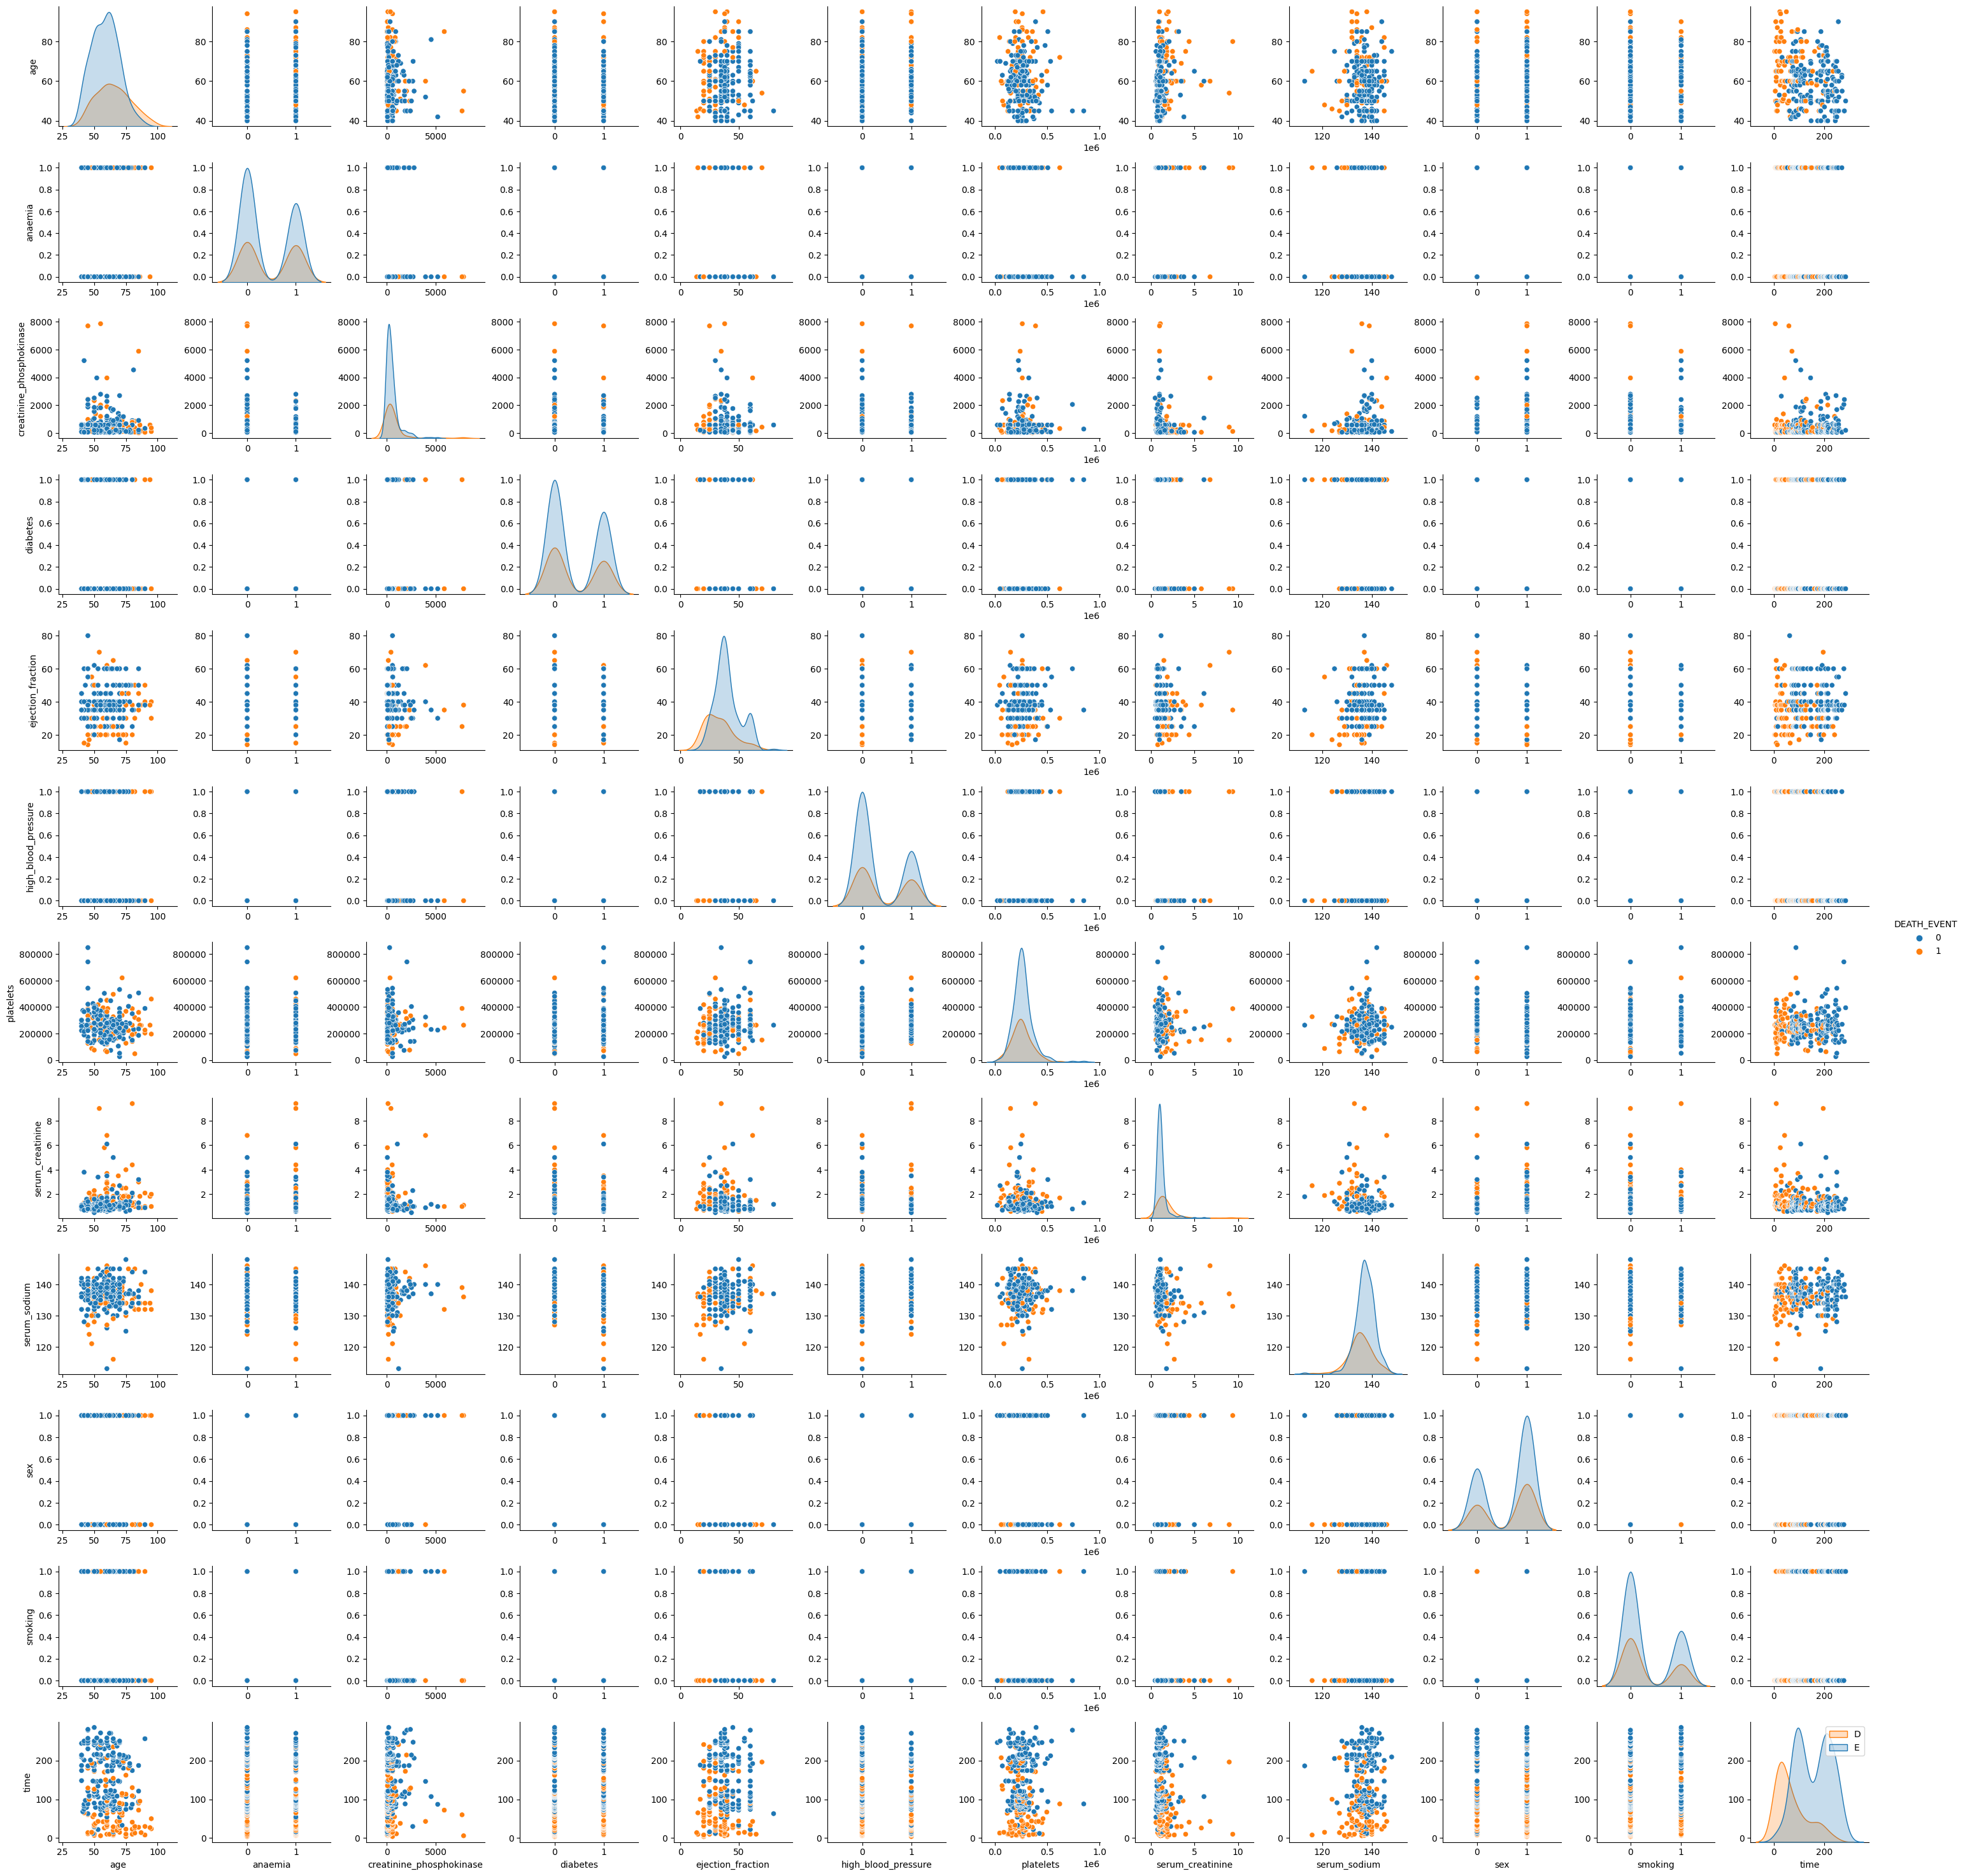

In [6]:
g = sns.pairplot(df,hue="DEATH_EVENT")
for ax in g.axes.flat:
    ax.tick_params(axis='both', labelleft=True, labelbottom=True)
    
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.legend("DEATH_EVENT")
plt.plot()

**Comments:** 
* Regardless of age, patients who do not survive are mostly clustered towards the lower ejection fraction end (this makes sense as a lower ejection fraction means the blood pumps less efficiently) than those who survive. (**Age vs Ejection Fraction**) This is similarly reflected by the distribution of Ejection Fraction, where those that do not survive have a lower mean ejection fraction than those that survive.
* Patients who do not survive tend to have more extreme values of creatine phosphokinase (when looking at CPK plotted against all other features). This is reasonable as when CPK is high, this means that there is generally stress or injury to the heart, brain or skeletal muscle.
* Similar observation can be made for serum creatinine. There are more extreme values for serum creatinine for the patients do not survive. It is a metric on how well the patients' kidneys are working. High levels of serum creatinine mean that the kidneys are not working as well, and would potentially affect cardiovascular health
* Patients who do not survive tend to have less follow-up time than patients who do survive (clustered towards the lower end of time). This is reflected in multiple plots of time against other features.

<span style="color:crimson;font-size:22px"><b> Step 2: Data Pre-processing </b></span>
### 2.1 Handling Missing Values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

**Comment:** There are no missing values so no imputation needs to be done.

### 2.2 Detecting Outliers

In [9]:
#numerical_features= df.drop(["DEATH_EVENT"], axis=1).select_dtypes('number').columns.tolist()

#categorical_features = df.select_dtypes('object').columns.tolist()
#print(numerical_features)

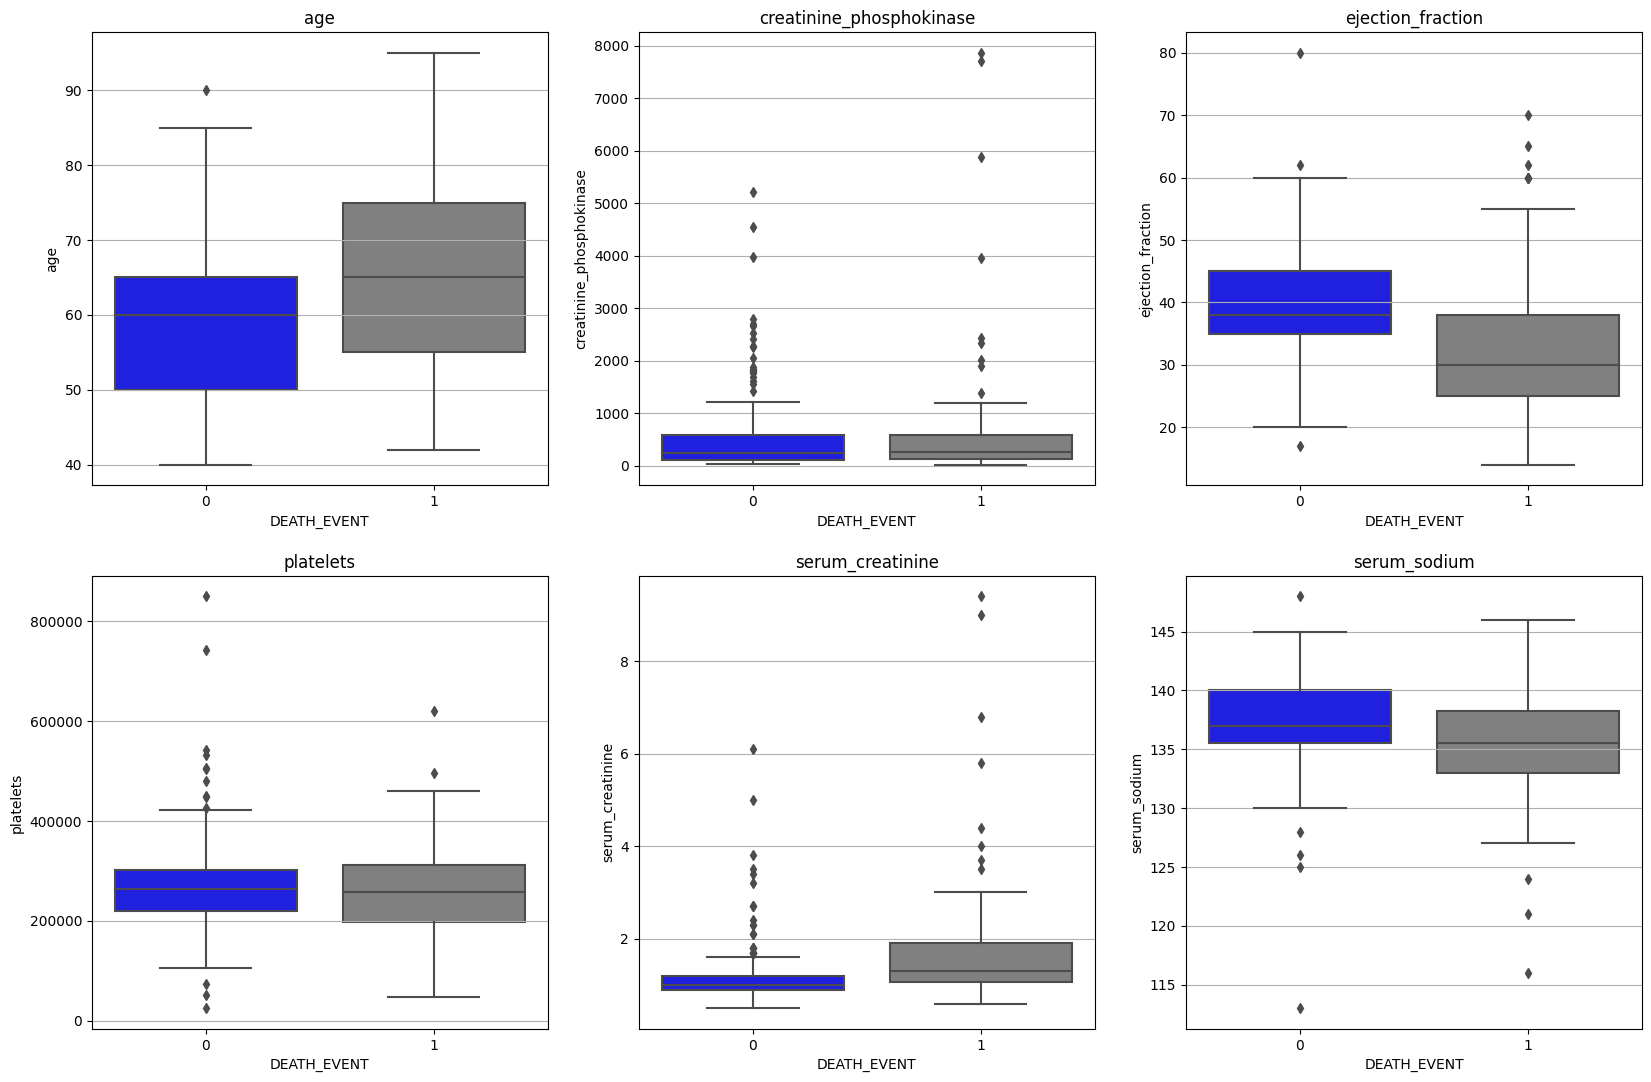

In [10]:
numerical_features = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium"]
categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

plt.figure(figsize = (20, 20))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    plt.grid(True)
    plt.title(col)
    sns.boxplot(data = df, x = "DEATH_EVENT", y = col, palette = ["blue", "grey"])

### 2.3 Standardising Input Variables

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = df.drop("DEATH_EVENT",axis = 1)
Y = df["DEATH_EVENT"]
X_std = sc.fit(X).transform(X)

<span style="color:crimson;font-size:22px"><b> Step 3: Feature Selection </b></span>
### 3.1 Distributions of Features against Target Variable

There are distinct differences in the survival and death distributions of creatinine_phosphokinase, ejection_fraction and serum_creatinine. These may be important features.

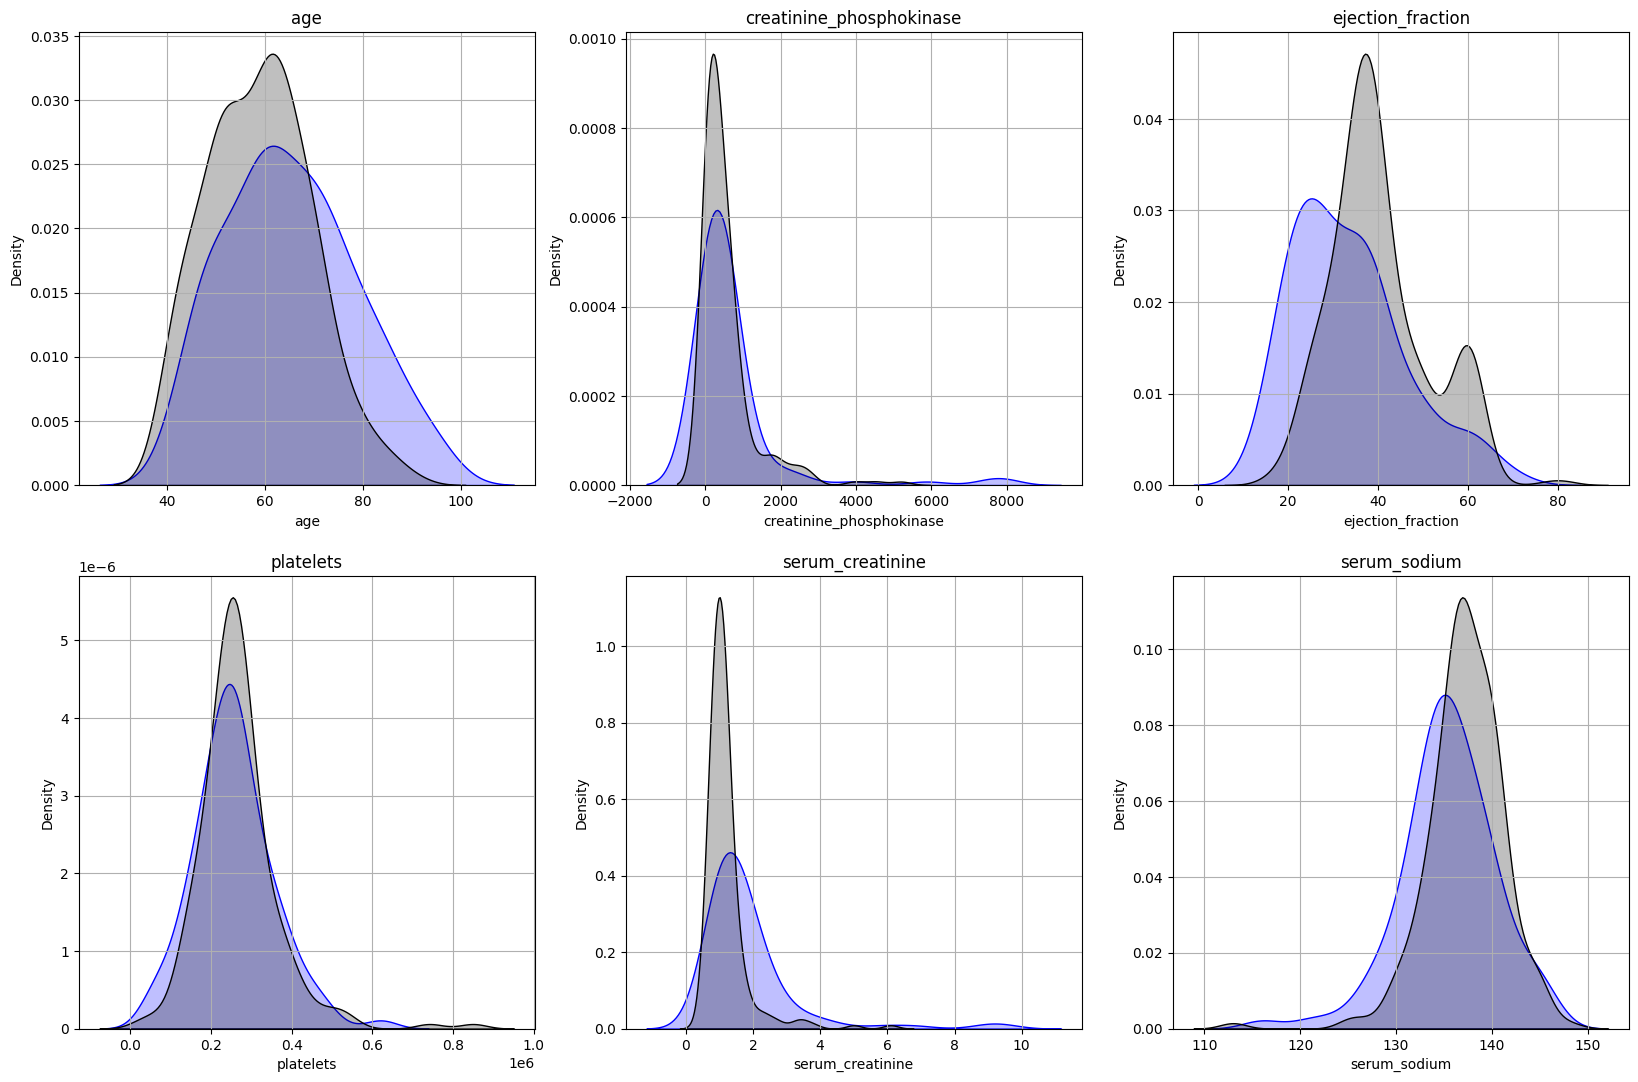

In [12]:
plt.figure(figsize = (20, 20))

for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(df.loc[df["DEATH_EVENT"] == 1, col], label = "survived", fill = True, color = "blue")
    sns.kdeplot(df.loc[df["DEATH_EVENT"] == 0, col], label = "death", fill = True, color = "black") 

### 3.2 Chi Squared Tests

We are aiming to select features which are highly dependent on the response. We will test the significant association between each categorical variable and the target variable (which is also categorical)
The hypothesis being tested for chi-square is:

(a) Null: There is no relationship between categorical feature and target variable

(b) Alternate: There is somerelationship between categorical feature and target variable

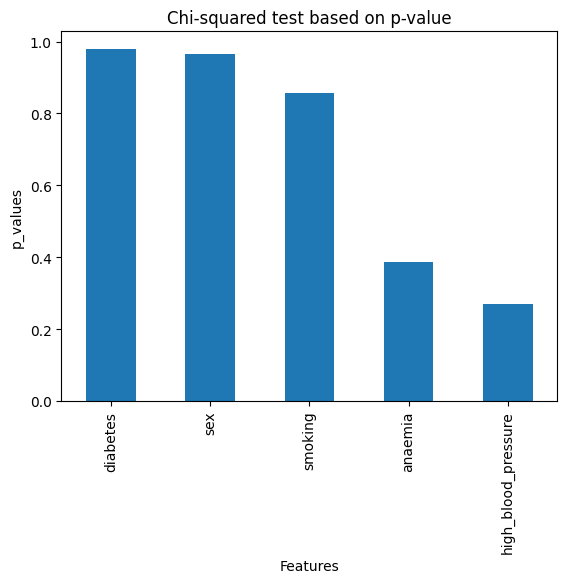

In [13]:
from sklearn.feature_selection import chi2

X_std = df.loc[:, categorical_features]
y = df.iloc[:, -1]
f_score = chi2(X_std, y)
p_value = pd.Series(f_score[1], index = X_std.columns)
p_value.sort_values(ascending = False, inplace = True)
p_value.plot(kind = "bar")
plt.xlabel("Features")
plt.ylabel("p_values")
plt.title("Chi-squared test based on p-value")
plt.show()